data: from https://zenodo.org/record/4060432#.X5ySHHhKgWo


Thesis: identify humans (voice), animals, instruments, water, door, car, explosion (boom, thunder)



To do items:

- create new columns of labels I will use (tags too long and many)

- extract MFCC of all files to add to dataframe

- consider need to trim audio files to make same length, OR adding length to short files (padding them?)

In [3]:
import pandas as pd


In [4]:
dev_info = pd.read_json('FSD50K.metadata/dev_clips_info_FSD50K.json')

In [7]:
eval_info = pd.read_json('FSD50K.metadata/eval_clips_info_FSD50K.json').T


In [5]:
dev_info = dev_info.T

In [6]:
dev_info = dev_info.sort_index()
dev_info['track_num'] = dev_info.index
dev_info['track_num'] = dev_info['track_num'].apply(lambda x: str(x) + '.wav')
#dev_info.head()

In [13]:
# Nothing useful here, but why would they include this if useless?

# ratings_info = pd.read_json('FSD50K.metadata/pp_pnp_ratings_FSD50K.json')
# ratings_info.head()

In [8]:
eval_info.sort_index(inplace=True)
eval_info['track_num'] = eval_info.index
eval_info['track_num'] = eval_info['track_num'].apply(lambda x: str(x) + '.wav')
#eval_info.head()

In [9]:
dev_info['track_num'] = dev_info.index
dev_info['track_num'] = dev_info['track_num'].apply(lambda x: str(x) + '.wav')
#dev_info.head()

In [10]:
unique_tags = []

for tag_list in dev_info.tags:
    for sub_tag in tag_list:
        if sub_tag not in unique_tags:
            unique_tags.append(sub_tag)

In [11]:
len(unique_tags)

16309

In [12]:
unique_first_tags = []

for tag_list in dev_info.tags:
        if tag_list[0] not in unique_first_tags:
            unique_first_tags.append(tag_list[0])

In [13]:
len(unique_first_tags)

4277

In [14]:
unique_first_tags[:5]

['male', 'keyboard', 'computer', 'bell', 'bus']

In [15]:
unique_second_tags = []

for tag_list in dev_info.tags:
    if len(tag_list) >1:
        if tag_list[1] not in unique_second_tags:
            unique_second_tags.append(tag_list[1])

In [16]:
unique_second_tags[:5]

['voice', 'rhythmic', 'environmental-sounds-research', 'depart', 'engine']

In [17]:
all_firsts = []

for i in dev_info.tags:
    all_firsts.append(i[0])

In [18]:
len(all_firsts)

40966

In [19]:
len(set(all_firsts))

4277

In [20]:
all_firsts_series = pd.Series(all_firsts)

In [21]:
all_firsts_series.value_counts()[:5]

good-sounds        2212
multisample         785
field-recording     602
1-shot              533
guitar              465
dtype: int64

In [23]:
# for i in dev_info.tags:
#     if i[0] == 'guitar':
#         if len(i) > 1:
#             print(i[1])

In [24]:
counter = 0

for i in dev_info.tags: 
    if 'female' in i:
        counter +=1

print(counter)        

1159


In [25]:
counter = 0

for i in dev_info.tags: 
    if 'male' in i:
        counter +=1

print(counter)

1045


In [90]:
for i in dev_info.tags: 
    if 'nature' in i:
        print(i)

['crickets', 'found-sound', 'frogs', 'nature']
['andalucia', 'birds', 'dog', 'field-recording', 'nature', 'south-spain']
['andalucia', 'cave', 'field-recording', 'nature', 'south-spain', 'talk']
['andalucia', 'birds', 'field-recording', 'nature', 'south-spain']
['andalucia', 'birds', 'field-recording', 'flickr', 'nature', 'south-spain']
['andalucia', 'field-recording', 'insects', 'nature', 'south-spain']
['andalucia', 'field-recording', 'flickr', 'insects', 'nature', 'south-spain']
['andalucia', 'burn', 'crackle', 'field-recording', 'fire', 'house', 'nature', 'south-spain', 'spark']
['andalucia', 'field-recording', 'insects', 'nature', 'south-spain']
['andalucia', 'field-recording', 'insects', 'nature', 'south-spain']
['andalucia', 'birds', 'chirp', 'field-recording', 'nature', 'south-spain']
['andalucia', 'birds', 'field-recording', 'nature', 'south-spain']
['andalucia', 'birds', 'blackbird', 'field-recording', 'nature', 'south-spain']
['andalucia', 'field-recording', 'nature', 'tree'

In [26]:
dict_counter = {}

for row in dev_info.tags:
    for tag in row:
        if tag not in dict_counter:
            dict_counter[tag] =1
        else:
            dict_counter[tag] += 1

In [27]:
dict_counter

{'male': 1058,
 'voice': 2511,
 'keyboard': 576,
 'rhythmic': 106,
 'tap': 564,
 'type': 108,
 'computer': 342,
 'environmental-sounds-research': 225,
 'key': 267,
 'typing': 205,
 'bell': 673,
 'bus': 245,
 'depart': 15,
 'drive': 147,
 'station': 133,
 'car': 980,
 'engine': 820,
 'passing': 194,
 'dutch': 19,
 'speech': 875,
 'children': 126,
 'crying': 78,
 'field-recording': 3490,
 'train': 463,
 'crescendo': 13,
 'cat': 293,
 'purr': 61,
 'sneeze': 98,
 'anechoic': 6,
 'keys': 372,
 'metal': 1271,
 'ring': 460,
 'bark': 468,
 'dog': 744,
 'door': 1300,
 'lock': 73,
 'bass-drum': 35,
 'found-sound': 4,
 'household': 123,
 'kick': 383,
 'percussion': 1728,
 'crickets': 117,
 'frogs': 93,
 'nature': 1066,
 'drums': 647,
 'hi-hat': 370,
 'snare': 810,
 'roll': 90,
 'bean': 3,
 'belt': 19,
 'shaker': 238,
 'version': 2,
 'excitation': 1,
 'random': 47,
 'dump': 2,
 'grunt': 126,
 'human': 968,
 'electronic': 278,
 'machine': 825,
 'printer': 103,
 'fire': 518,
 'gas': 591,
 'lighter':

In [28]:
foo = pd.DataFrame.from_dict(dict_counter, orient='index').sort_values(by=0, ascending= False)

In [29]:
foo.iloc[50:100]

,0
drums,647
english,646
trumpet,629
liquid,621
bang,600
clarinet,593
wind,593
girl,593
crowd,592
jazz,591


In [30]:
dev_info.iloc[100:150]

,title,description,tags,license,uploader,track_num
2081,CP_set2.wav,drumatic set 2,[clap],http://creativecommons.org/licenses/sampling+/...,opm,2081.wav
2083,CP_set4.wav,drumatic set 4,[clap],http://creativecommons.org/licenses/sampling+/...,opm,2083.wav
2139,breathehope - kitchen - 13.wav,From my Kitchen,"[beat, field-recording, kitchen, metal]",http://creativecommons.org/licenses/sampling+/...,smallsushi,2139.wav
2167,laundromat01.wav,"droning bass sound, recorded to minidisc in th...","[bass, drone, field-recording, machinery]",http://creativecommons.org/licenses/sampling+/...,edwin_p_manchester,2167.wav
2215,rustle1.wav,wind in a stove pipe (different again),"[field-recording, hiss, noise, rustle, stove-p...",http://creativecommons.org/licenses/by/3.0/,Andrew Duke,2215.wav
2216,rustle2.wav,wind in a stove pipe (different yet again),"[field-recording, hiss, rustle, stove-pipe, wind]",http://creativecommons.org/licenses/by/3.0/,Andrew Duke,2216.wav
2217,train1.wav,train passing over bridge in montreal,"[bridge, canada, field-recording, montreal, pa...",http://creativecommons.org/licenses/by/3.0/,Andrew Duke,2217.wav
2298,sample.mp3,Guitar riff with medium overdrive.\nRecorded w...,"[guitar, instrument, riff]",http://creativecommons.org/publicdomain/zero/1.0/,Suva,2298.wav
2300,pss480freqbeats.mp3,small frequency change beat on a yamaha pss 480.,"[beat, keyboard, radio, space, synth]",http://creativecommons.org/licenses/by/3.0/,jdcflash,2300.wav
2396,AndrewDuke0051.wav,"no bees, or wind, or water used in this, but i...","[2-bar, ambient, bees, dark, drone, electronic...",http://creativecommons.org/licenses/by/3.0/,Andrew Duke,2396.wav


In [43]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [ ]:
# Radvess method

# Pick a fearful track
fname = rav_file_path + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [46]:
audio_dir = '/Users/Mateo/Springboard/FSD50k_stuff/FSD50K.dev_audio/'
list_of_file_names = dev_info.track_num.to_list()
list_of_file_names[0]

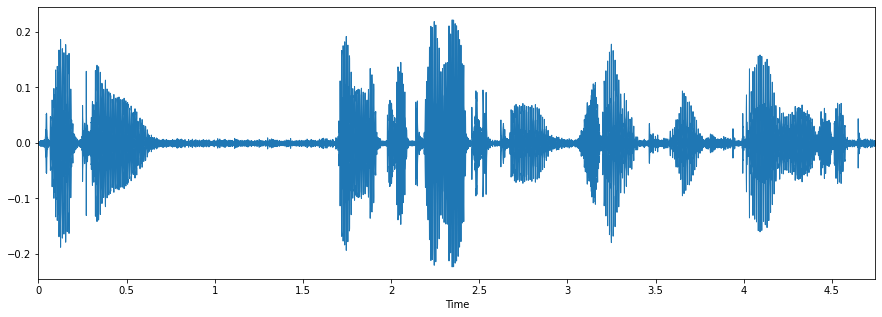

In [47]:
# audio_dir = '/Users/Mateo/Springboard/FSD50k_stuff/FSD50K.dev_audio'
# list_of_file_names = dev_info.track_num.to_list()

# lets try to load 1 audio file
fname = audio_dir + list_of_file_names[0]
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)



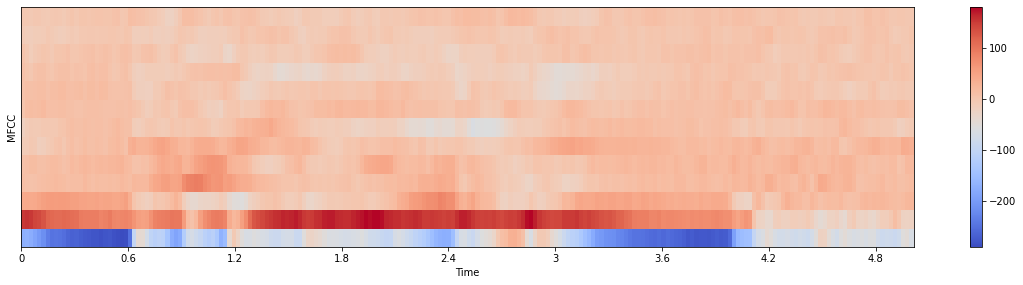

In [57]:
# MFCC

file_path = audio_dir + list_of_file_names[25000]

X, sample_rate = librosa.load(file_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(file_path)

In [ ]:
# Kates function for extracting MFCC 

import numpy as np
import scipy.io.wavfile as wav
from scipy.fftpack import dct
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import soundfile
import sklearn
import shutil
import pandas as pd
from numpy import argmax
import librosa
import librosa.display
import IPython.display
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import json

#to get mfcc features for a single file
def extract_mfcc_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed

#get mfcc features for all files
def get_all_features(df, audio_folder):
    features = []
    for item in df.index:
        filename = item + '.wav'
        data = extract_mfcc_features(f'{audio_folder}/{filename}')
        class_label = df.loc[item]['instrument_family_str']
        features.append([data, class_label, item])

In [ ]:
##### Heres a function for padding silence into the audio file

I did a small script which allows you to prepend your signal with a silence in order to obtain the target duration in seconds. It uses the scipy function for reading of the wav file.

#!/usr/bin/env python

from __future__ import print_function, division
import scipy.io.wavfile as wavf
import numpy as np
from sys import argv

def pad_audio(data, fs, T):
    # Calculate target number of samples
    N_tar = int(fs * T)
    # Calculate number of zero samples to append
    shape = data.shape
    # Create the target shape    
    N_pad = N_tar - shape[0]
    print("Padding with %s seconds of silence" % str(N_pad/fs) )
    shape = (N_pad,) + shape[1:]
    # Stack only if there is something to append    
    if shape[0] > 0:                
        if len(shape) > 1:
            return np.vstack((np.zeros(shape),
                              data))
        else:
            return np.hstack((np.zeros(shape),
                              data))
    else:
        return data

if __name__ == "__main__":
    if len(argv) != 4:
        print("Wrong arguments.")
        print("Use: %s in.wav out.wav target_time_s" % argv[0])
    else:
        in_wav = argv[1]
        out_wav = argv[2]
        T = float(argv[3])        
        # Read the wav file
        fs, in_data = wavf.read(in_wav)
        # Prepend with zeros
        out_data = pad_audio(in_data, fs, T)
        # Save the output file
        wavf.write(out_wav, fs, out_data)